In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Load the data from the CSV file
df = pd.read_csv('covid.csv')

In [15]:
# Display the first few rows of the DataFrame to understand its structure
print(df.head())

         Date Name of State / UT  Latitude  Longitude  Total Confirmed cases  \
0  2020-01-30             Kerala   10.8505    76.2711                    1.0   
1  2020-01-31             Kerala   10.8505    76.2711                    1.0   
2  2020-02-01             Kerala   10.8505    76.2711                    2.0   
3  2020-02-02             Kerala   10.8505    76.2711                    3.0   
4  2020-02-03             Kerala   10.8505    76.2711                    3.0   

  Death  Cured/Discharged/Migrated  New cases  New deaths  New recovered  
0     0                        0.0          0           0              0  
1     0                        0.0          0           0              0  
2     0                        0.0          1           0              0  
3     0                        0.0          1           0              0  
4     0                        0.0          0           0              0  


In [16]:
# Display basic information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       4692 non-null   object 
 1   Name of State / UT         4692 non-null   object 
 2   Latitude                   4692 non-null   float64
 3   Longitude                  4692 non-null   float64
 4   Total Confirmed cases      4692 non-null   float64
 5   Death                      4692 non-null   object 
 6   Cured/Discharged/Migrated  4692 non-null   float64
 7   New cases                  4692 non-null   int64  
 8   New deaths                 4692 non-null   int64  
 9   New recovered              4692 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 366.7+ KB
None


In [17]:
# Check for null values in the dataset
print("Null values in each column:\n", df.isnull().sum())

Null values in each column:
 Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                0
dtype: int64


In [18]:
# Handle null values
# Fill null values with 0 for numerical columns
df['Total Confirmed cases'] = df['Total Confirmed cases'].fillna(0)
df['Death'] = df['Death'].fillna(0)
df['Cured/Discharged/Migrated'] = df['Cured/Discharged/Migrated'].fillna(0)
df['New cases'] = df['New cases'].fillna(0)
df['New deaths'] = df['New deaths'].fillna(0)
df['New recovered'] = df['New recovered'].fillna(0)

In [19]:
# For 'Date' column, if there are null values, you might want to drop those rows
df.dropna(subset=['Date'], inplace=True)

In [20]:
# Convert 'Date' column to datetime format using .loc[]
df.loc[:, 'Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' column is in datetime format

In [21]:
# Example: Plot total confirmed cases over time for a specific state
state = 'Tamil Nadu'  # Replace with the state you are interested in
state_data = df[df['Name of State / UT'] == state].copy()  # Filter rows for the specified state and create a copy

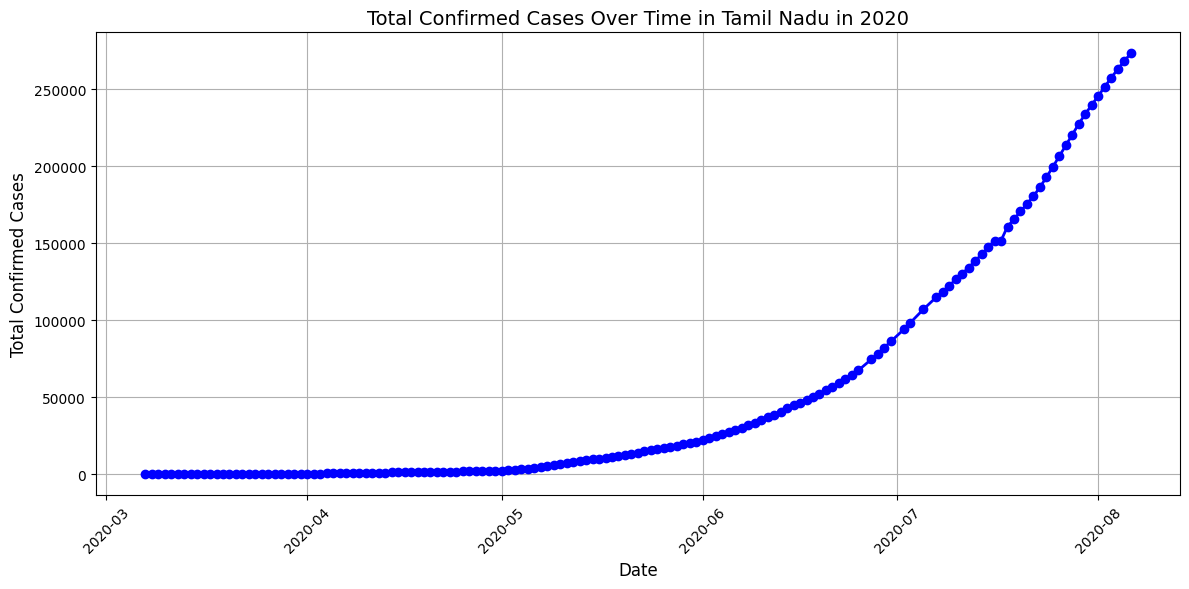

In [25]:
# Create a line plot for total confirmed cases over time
plt.figure(figsize=(12, 6))  # Set the size of the plot
plt.plot(state_data['Date'], state_data['Total Confirmed cases'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title(f'Total Confirmed Cases Over Time in {state} in 2020', fontsize=14)  # Title of the plot
plt.xlabel('Date', fontsize=12)  # X-axis label
plt.ylabel('Total Confirmed Cases', fontsize=12)  # Y-axis label
plt.grid(True)  # Show grid lines
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [26]:
# Example: Bar chart of total confirmed cases by state
state_summary = df.groupby('Name of State / UT')['Total Confirmed cases'].max().sort_values(ascending=False)

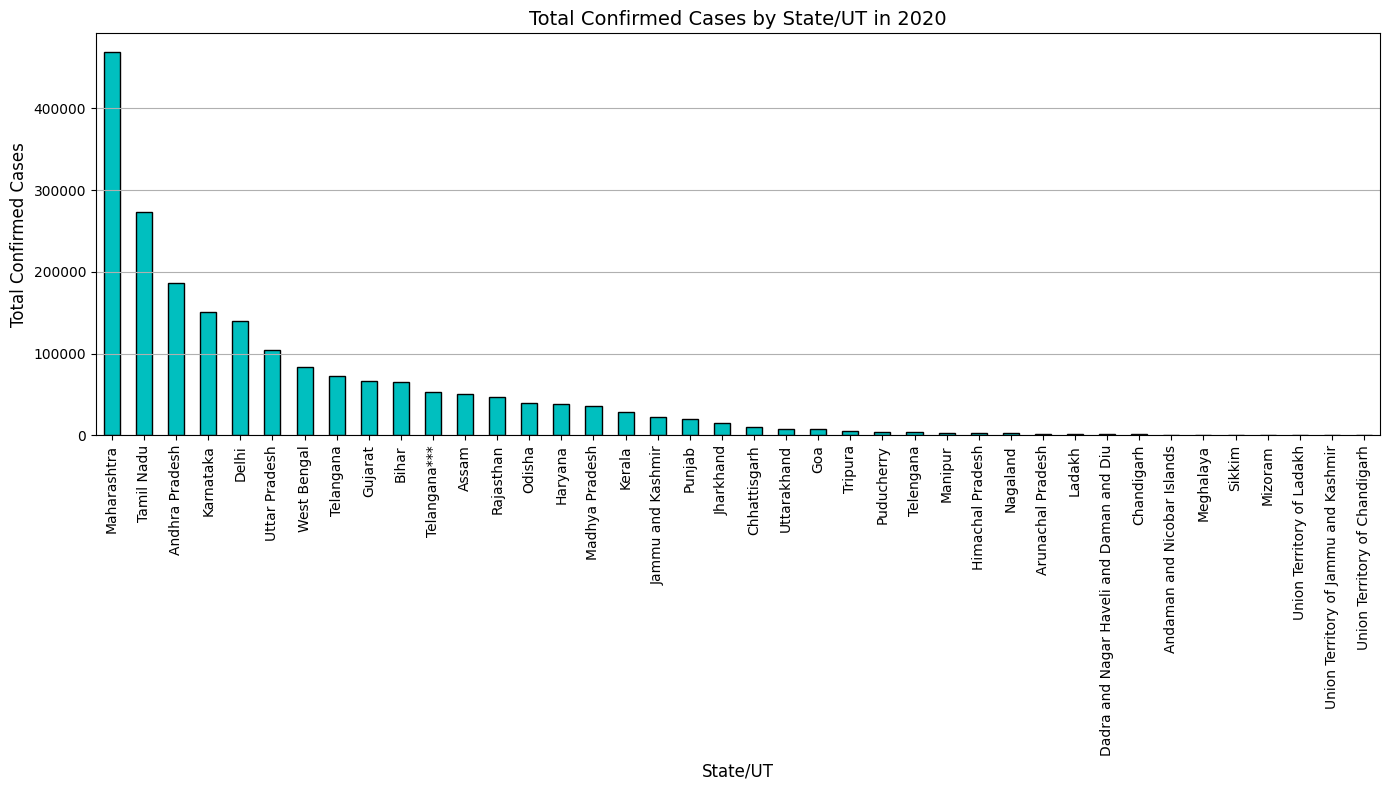

In [27]:
# Create a bar chart to compare total confirmed cases by state
plt.figure(figsize=(14, 8))  # Set the size of the plot
state_summary.plot(kind='bar', color='c', edgecolor='k')
plt.title('Total Confirmed Cases by State/UT in 2020', fontsize=14)  # Title of the plot
plt.xlabel('State/UT', fontsize=12)  # X-axis label
plt.ylabel('Total Confirmed Cases', fontsize=12)  # Y-axis label
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Show grid lines on y-axis
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [28]:
# Example: Pie chart of proportion of total confirmed cases by state
top_states = state_summary.head(10)  # Top 10 states by confirmed cases

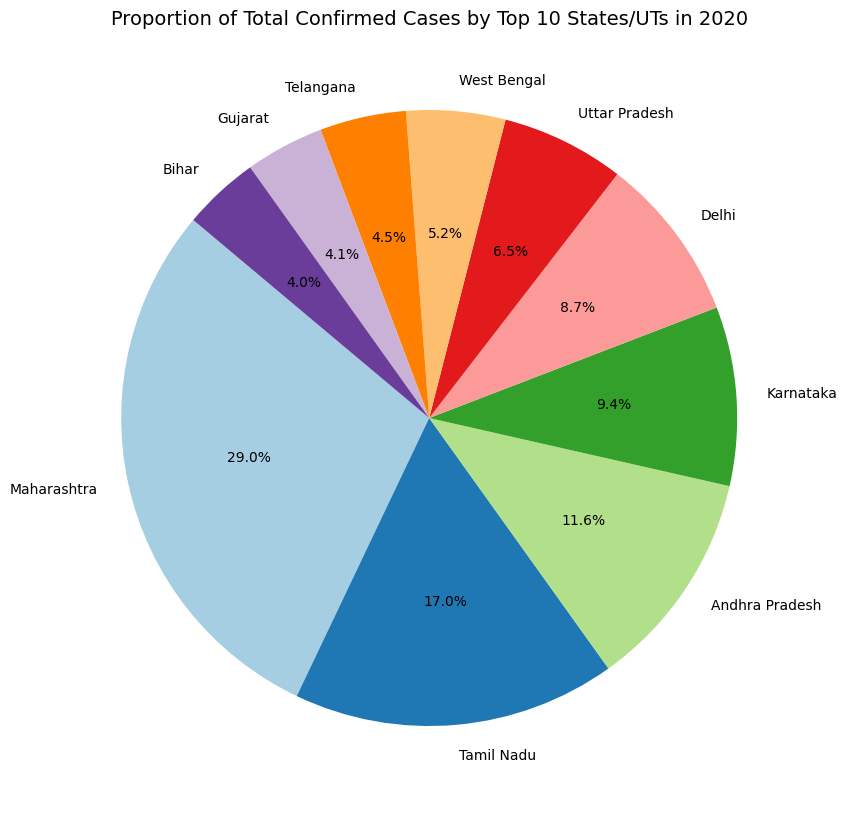

In [29]:
# Create a pie chart to show proportions
plt.figure(figsize=(10, 10))  # Set the size of the plot
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', colors=plt.cm.Paired(np.arange(len(top_states))), startangle=140)
plt.title('Proportion of Total Confirmed Cases by Top 10 States/UTs in 2020', fontsize=14)  # Title of the plot
plt.show()

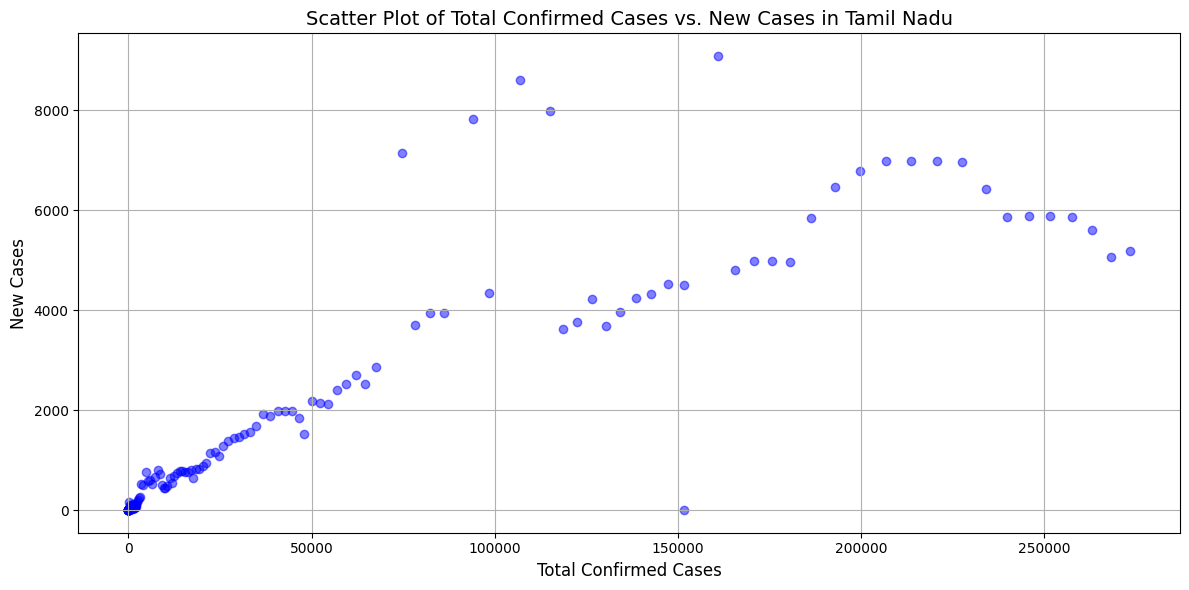

In [30]:
# Example: Scatter plot of total confirmed cases vs. new cases for a specific state
plt.figure(figsize=(12, 6))  # Set the size of the plot
plt.scatter(state_data['Total Confirmed cases'], state_data['New cases'], c='b', alpha=0.5, marker='o')
plt.title(f'Scatter Plot of Total Confirmed Cases vs. New Cases in {state}', fontsize=14)  # Title of the plot
plt.xlabel('Total Confirmed Cases', fontsize=12)  # X-axis label
plt.ylabel('New Cases', fontsize=12)  # Y-axis label
plt.grid(True)  # Show grid lines
plt.tight_layout()  # Adjust layout to fit labels
plt.show()